In [2]:
import pandas as pd
import numpy as np
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
import re
import spacy
from nltk.corpus import sentiwordnet as swn
from IPython.display import clear_output
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
#from wordcloud import WordCloud
import plotly
plotly.offline.init_notebook_mode (connected = True)

In [13]:
data = pd.read_csv('tripadvisor_hotel_reviews.csv')
data

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1


In [14]:
def preprocess_hotel_data(data,name):
    # Proprocessing the data
    data[name]=data[name].str.lower()
    # Code to remove the Hashtags from the text
    data[name]=data[name].apply(lambda x:re.sub(r'\B#\S+','',x))
    # Code to remove the links from the text
    data[name]=data[name].apply(lambda x:re.sub(r"http\S+", "", x))
    # Code to remove the Special characters from the text 
    data[name]=data[name].apply(lambda x:' '.join(re.findall(r'\w+', x)))
    # Code to substitute the multiple spaces with single spaces
    data[name]=data[name].apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))
    # Code to remove all the single characters in the text
    data[name]=data[name].apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))
    # Remove the twitter handlers
    data[name]=data[name].apply(lambda x:re.sub('@[^\s]+','',x))

In [15]:
# Function to tokenize and remove the stopwords    
def rem_stopwords_tokenize(data,name):
      
    def getting(sen):
        example_sent = sen

        stop_words = set(stopwords.words('english')) 

        word_tokens = word_tokenize(example_sent) 

        filtered_sentence = [w for w in word_tokens if not w in stop_words] 

        filtered_sentence = [] 

        for w in word_tokens: 
            if w not in stop_words: 
                filtered_sentence.append(w) 
        return filtered_sentence
    x=[]
    for i in data[name].values:
        x.append(getting(i))
    data[name]=x

In [17]:
# Making a function to lemmatize all the words
lemmatizer = WordNetLemmatizer() 
def lemmatize_all(data,name):
    arr=data[name]
    a=[]
    for i in arr:
        b=[]
        for j in i:
            x=lemmatizer.lemmatize(j,pos='a')
            x=lemmatizer.lemmatize(x)
            b.append(x)
        a.append(b)
    data[name]=a

In [18]:
# Function to make it back into a sentence 
def make_sentences(data,name):
    data[name]=data[name].apply(lambda x:' '.join([i+' ' for i in x]))
    # Removing double spaces if created
    data[name]=data[name].apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))

In [19]:
# Using the preprocessing function to preprocess the hotel data
preprocess_hotel_data(data,'Review')
# Using tokenizer and removing the stopwords
rem_stopwords_tokenize(data,'Review')
# Converting all the texts back to sentences
make_sentences(data,'Review')

In [21]:
# Getting nlp from spacy.load
nlp=spacy.load('en_core_web_sm')
# Making the function to get the sentiments out of the dataframe
def get_sentiment(data,name):
    count=1
    l=len(data)
    positive_sentiments=[]
    negative_sentiments=[]
    for tex in data[name].values:
        print('The current status is :',count*100/l,'%')
        tex=nlp(tex)
        noun=[]
        verb=[]
        adj=[]
        adv=[]
        for i in tex :
            if i.pos_=='NOUN':
                noun.append(i)
            elif i.pos_ =='ADJ':
                adj.append(i)
            elif i.pos_ =='VERB':
                verb.append(i)
            elif i.pos_=='ADV':
                adv.append(i)
        clear_output(wait=True)
        count+=1
        neg_score=[]
        pos_score=[]
        for i in tex :
            try:
                if i in noun:
                    x=swn.senti_synset(str(i)+'.n.01')
                    neg_score.append(x.neg_score())
                    pos_score.append(x.pos_score())
                elif i in adj:
                    x=swn.senti_synset(str(i)+'.a.02')
                    neg_score.append(x.neg_score())
                    pos_score.append(x.pos_score())
                elif i in adv :
                    x=swn.senti_synset(str(i)+'.r.02')
                    neg_score.append(x.neg_score())
                    pos_score.append(x.pos_score())
                elif i in verb :
                    x=swn.senti_synset(str(i)+'.v.02')
                    neg_score.append(x.neg_score())
                    pos_score.append(x.pos_score())

            except:
                pass
        positive_sentiments.append(np.mean(pos_score))
        negative_sentiments.append(np.mean(neg_score))

    data['Positive Sentiment']=positive_sentiments
    data['Negative Sentiment']=negative_sentiments

In [22]:
get_sentiment(data,'Review')

The current status is : 100.0 %


In [23]:
data.head()

,Review,Rating,Positive Sentiment,Negative Sentiment
0,nice hotel expensive parking got good deal sta...,4,NaN,NaN
1,ok nothing special charge diamond member hilto...,2,NaN,NaN
2,nice rooms 4 experience hotel monaco seattle g...,3,NaN,NaN
3,unique great stay wonderful time hotel monaco ...,5,NaN,NaN
4,great stay great stay went seahawk game awesom...,5,NaN,NaN


In [24]:
overall=[]
for i in range(len(data)):
    if data['Positive Sentiment'][i]>data['Negative Sentiment'][i]:
        overall.append('Positive')
    elif data['Positive Sentiment'][i]<data['Negative Sentiment'][i]:
        overall.append('Negative')
    else:
        overall.append('Neutral')
data['Overall Sentiment']=overall

In [25]:
data.head()

,Review,Rating,Positive Sentiment,Negative Sentiment,Overall Sentiment
0,nice hotel expensive parking got good deal sta...,4,NaN,NaN,Neutral
1,ok nothing special charge diamond member hilto...,2,NaN,NaN,Neutral
2,nice rooms 4 experience hotel monaco seattle g...,3,NaN,NaN,Neutral
3,unique great stay wonderful time hotel monaco ...,5,NaN,NaN,Neutral
4,great stay great stay went seahawk game awesom...,5,NaN,NaN,Neutral


/Users/lisun/opt/anaconda3/envs/metis/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Overall Sentiment', ylabel='count'>

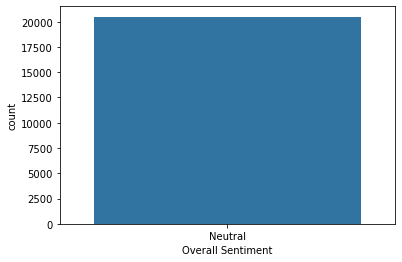

In [26]:
sns.countplot(data['Overall Sentiment'])
